<a href="https://colab.research.google.com/github/kungfumas/aplikasi-deep-learning/blob/master/clustering_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 8.9 MB/s 
     |████████████████████████████████| 167 kB 64.4 MB/s 
     |████████████████████████████████| 2.0 MB 50.8 MB/s 
     |████████████████████████████████| 6.8 MB 40.4 MB/s 
     |████████████████████████████████| 1.3 MB 42.2 MB/s 
     |████████████████████████████████| 88 kB 7.6 MB/s 
     |████████████████████████████████| 1.7 MB 46.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 268 kB 53.3 MB/s 
     |████████████████████████████████| 56 kB 6.3 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 137 kB 63.0 MB/s 
     |████████████████████████████████| 16.9 MB 47.9 MB/s 
     |████████████████████████████████| 

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [6]:
df.head

<bound method NDFrame.head of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>

In [9]:
from pycaret.clustering import *

In [11]:
exp_clu101 = setup(df, normalize = True, 
                   ignore_features = ['variety'],
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(150, 5)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(150, 4)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['variety'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numer...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
              

In [12]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3839,207.2666,0.8797,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [13]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [14]:
kmodes = create_model('kmodes', num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0978,14.5569,2.9161,0,0,0


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:KModes(cat_dissim=<function matching_dissim at 0x7fe279567290>, init='Cao',
       max_iter=100, n_clusters=3, n_init=1, n_jobs=-1, random_state=123,
       verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [15]:
kmean_results = assign_model(kmeans)
kmean_results.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(150, 6)
INFO:logs:assign_model() succesfully completed......................................


,sepal.length,sepal.width,petal.length,petal.width,variety,Cluster
0,5.1,3.5,1.4,0.2,Setosa,Cluster 0
1,4.9,3.0,1.4,0.2,Setosa,Cluster 3
2,4.7,3.2,1.3,0.2,Setosa,Cluster 3
3,4.6,3.1,1.5,0.2,Setosa,Cluster 3
4,5.0,3.6,1.4,0.2,Setosa,Cluster 0


In [16]:
plot_model(kmeans)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


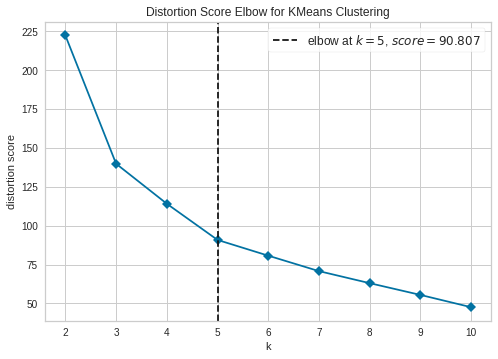

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
plot_model(kmeans, plot = 'elbow')

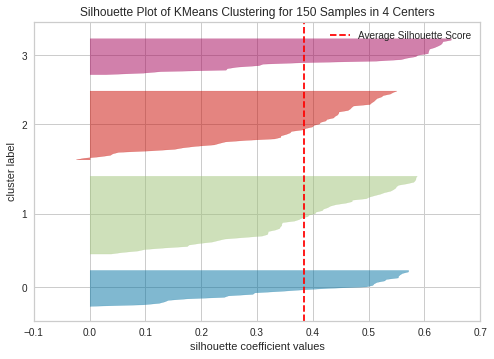

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [18]:
plot_model(kmeans, plot = 'silhouette')

In [19]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
